<a href="https://colab.research.google.com/github/IsaAfonsoCollares/Pos-Graduacao-em-Ciencias-de-Dados-Mackenzie/blob/main/Lei_de_Zipf_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarefa 

Implemente um programa em Python (Python notebook) que constrói um dicionário de termos de um documento (mínimo 1000 palavras) com a frequência de cada termo permitindo confirmar a lei de Zipf para o documento selecionado.  

O texto escolhido para ser analisado foi o artigo "10 Livros Incríveis Para Iniciar a Carreira de Analista de Dados" da Data Science Academy, dísponivel em https://blog.dsacademy.com.br/10-livros-incriveis-para-iniciar-a-carreira-de-analista-de_dados/, acesso em 02/11/2022 ás 22hs.

Escolhi este texto por se tratar de um artigo sobre livros interessantes para a área de análise de dados.

O texto foi copiado do site e transformado num arquivo txt,o qual será utilizado neste exercício.

# Importando pacotes

In [ ]:
# pacote para análise e manipulação de dados
import pandas as pd  

# pacotes para visualização de dados estatisticos 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Aquisição e limpeza dos dados

In [ ]:
texto = []    #cria lista vazia

artigo = open('artigo_analise_de_dados.txt','r')    # abri arquivo para leitura

for line in artigo:     # percorre todas as linhas do texto
    texto.append(line)  # adicona cada linha como um novo elemento na lista

# o código abaixo limpa o texto, retirando caracteres que possam alterar
# a contagem de palavras e unificando as letras como minusculas, para evitar que
# a mesma palavra seja considerada diferente por utilizar letra maiscula em um 
# caso e minuscula no outro.

for i in range(len(texto)):
    texto[i] = texto[i].lower() 
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace(';','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('—','')
    texto[i] = texto[i].replace('\'','') 

# Criação do dicionário

In [ ]:
texto_dict = {}     # cria um dicionário vazio

for line in texto :     # percorre todos os elementos da lista texto
  palavras = line.split()    # tranforma a linha em uma lista de palavras, por padrão usa o espaço como separador

  for palavra in palavras:  # percorre todos os elementos da lista palavras 
    if palavra in texto_dict.keys():   # testa se a palavra já está presente no dicionário
      texto_dict[palavra] = texto_dict[palavra] + 1  # soma 1 ao valor relacionado á esta palavra
      
    else:     # caso a condição IF acima não ocorra
      texto_dict[palavra] = 1    # cria a chave para esta palavra e determina o valor da mesma como 1

# Criação do data frame 

In [ ]:
df = pd.DataFrame(texto_dict.items(), columns=["palavras" , "contagem"])    # cria um data frame que contenha os items do dicionário e determina as colunas
df = df.sort_values("contagem", ascending = False)     # substitui o data frame por um onde a coluna "Contagem" é ordenada de forma decrescente 
df = df[df.contagem > 4]      # substitui o data frame para considerar apenas valores acima de 4 na coluna "Contagem"

# Visualização dos dados

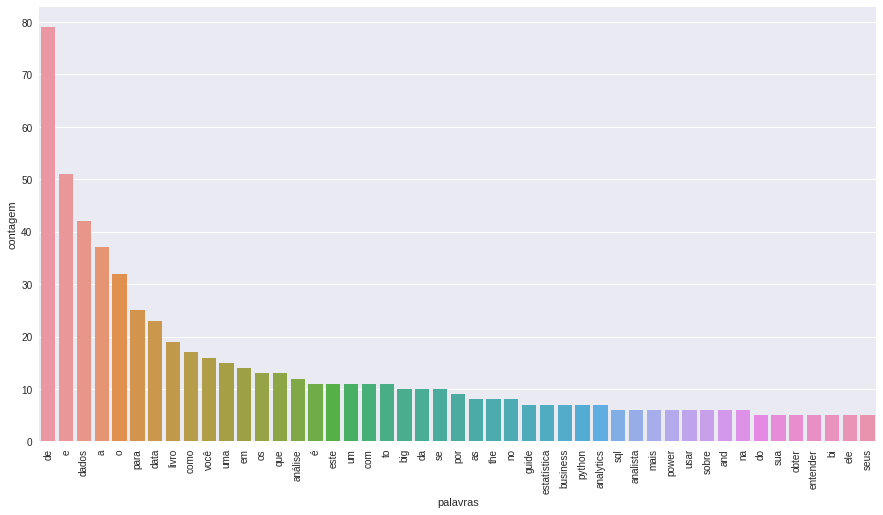

In [ ]:
plt.figure(figsize=(15,8))
mpl.style.use(['seaborn'])
sns.barplot(x=df.palavras,y=df.contagem)
plt.xticks(rotation=90) 

plt.show()